In [1]:
import tensorflow as tf
import keras
import numpy as np
from keras import layers, models

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(type(trainImages[0]), trainImages.shape, trainImages[0].shape)

origImage = trainImages[0]
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[0])
newImage = trainImages[0]

NUM_DIGITS = 10
trainLabels = keras.utils.np_utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = keras.utils.np_utils.to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[:5])

model = models.Sequential()
model.add(layers.Dense(128, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
board = keras.callbacks.TensorBoard(log_dir='logs/demo71/', histogram_freq=0,
                                    write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[board])


<class 'numpy.ndarray'> (60000, 784) (784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9275
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9663
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9756
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9823
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.99 - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 10/20
1875/1875 [============================

In [3]:
predictResult = model.predict(testImages)
predictResult[:5]

array([[1.47940034e-08, 2.14649899e-13, 2.67905218e-08, 5.79456525e-07,
        4.25279402e-18, 1.77023774e-13, 2.92450150e-21, 9.99999285e-01,
        2.04311484e-10, 1.55948328e-07],
       [4.60844869e-11, 3.50367955e-13, 1.00000000e+00, 8.43447510e-16,
        1.63624945e-34, 7.39707865e-19, 8.35802190e-16, 3.36144778e-30,
        1.33919403e-16, 1.45260009e-24],
       [1.35798655e-11, 9.99993682e-01, 9.07699302e-08, 7.19206431e-11,
        1.90175375e-10, 4.41048442e-09, 1.91821381e-09, 4.63924323e-07,
        5.76090770e-06, 4.23225989e-13],
       [1.00000000e+00, 4.61716005e-18, 4.77054264e-11, 2.51594593e-16,
        2.25257316e-14, 3.88184951e-15, 2.23648960e-10, 9.29496687e-15,
        6.73978766e-21, 2.00393816e-11],
       [2.47495256e-15, 2.92021127e-17, 2.84211077e-13, 3.26280882e-15,
        9.99997973e-01, 1.36859131e-18, 6.06009925e-13, 3.79467421e-12,
        5.16281108e-15, 1.99565443e-06]], dtype=float32)

In [5]:
predict = np.argmax(predictResult, axis=-1)
predict[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [7]:
loss, accuracy = model.evaluate(testImages, testLabels)
loss, accuracy

313/313 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9774


(0.12137060612440109, 0.977400004863739)

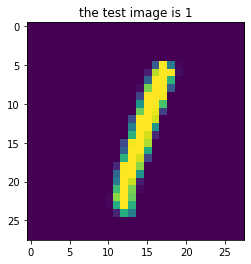

In [11]:
from matplotlib import pyplot as plt
def plotTestImage(index):
    plt.title("the test image is %d"%test_labels[index])
    plt.imshow(test_images[index])
    plt.show()
plotTestImage(5)

In [12]:
trainHistory = model.fit(trainImages, trainLabels, epochs=20, validation_split=0.1)


Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0065 - val_accuracy: 0.9973
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0105 - val_accuracy: 0.9968
Epoch 3/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0058 - val_accuracy: 0.9978
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0134 - val_accuracy: 0.9958
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0116 - val_accuracy: 0.9965
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0138 - val_accuracy:

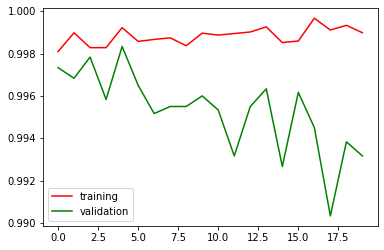

In [14]:
plt.plot(trainHistory.history['accuracy'],color='red')
plt.plot(trainHistory.history['val_accuracy'], color='green')
plt.legend(['training', 'validation'])

In [15]:
import pandas as pd
pd.crosstab(test_labels, predict, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,1,0,0,1,0,0,1,0
1,2,1120,0,5,0,0,2,0,6,0
2,3,2,1013,4,1,0,2,1,5,1
3,0,0,4,992,0,3,0,2,3,6
4,3,2,4,1,957,0,3,4,1,7
5,3,1,0,7,2,869,4,0,6,0
6,11,2,1,1,2,3,938,0,0,0
7,3,10,12,6,0,0,1,982,5,9
8,5,0,4,10,4,4,0,2,943,2


In [17]:
measure1 = pd.DataFrame({'label':test_labels, 'predict':predict})
measure1[:20]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [22]:
# depend on your result
error_2_7 = measure1[(measure1.label==7) & (measure1.predict==2)]

Int64Index([1226, 1754, 1941, 2016, 2314, 2671, 7978, 9009, 9015, 9019, 9024,
            9505],
           dtype='int64')


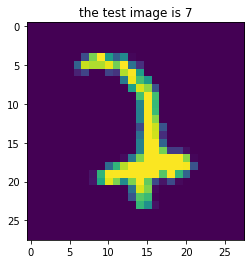

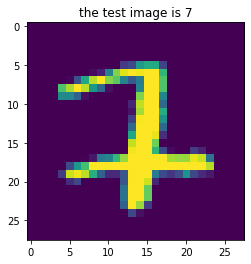

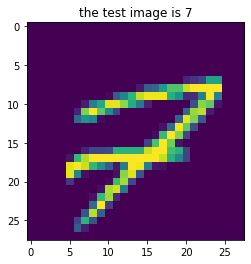

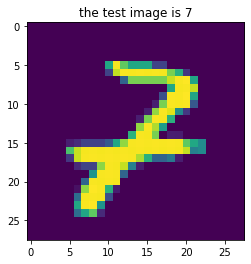

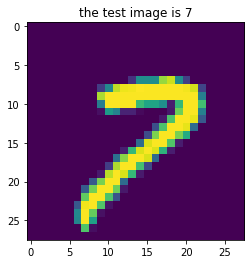

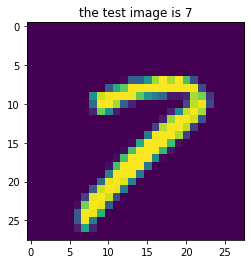

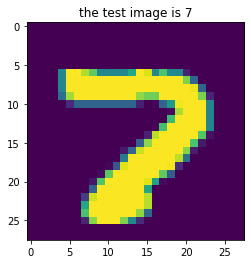

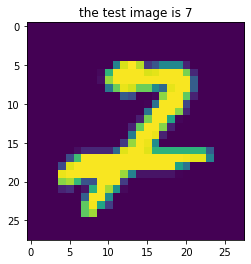

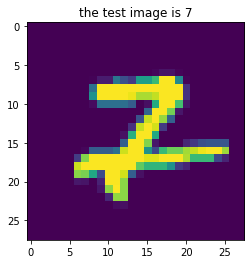

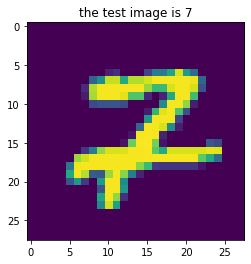

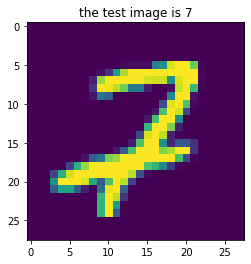

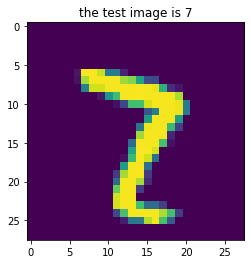

In [25]:
print(error_2_7.index)
for i in error_2_7.index:
    plotTestImage(i)